### 딥-러닝 과정 Mulit Layer Perceptron(MLP) 

## Keras 모델 생성/학습 - 당뇨병 예측 모델

In [1]:
# 1. Pandas 가져오기
import pandas as pd

In [2]:
# 2. 데이터 불러오기
df = pd.read_csv('diabetes_data.csv')
df

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# 3. X/y 나누기
X = df.iloc[:,:8]
X
y = df.iloc[:, 8:]
y

,result
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [4]:
# 4. Train set, Test set split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=321)

#validation set's added.
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state= 100)


In [5]:
# 5. Keras 패키지 가져오기
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [72]:
# 6. MLP 모델 생성
model = keras.Sequential()
model.add(Dense(input_dim = 8, units = 128, activation='relu'))
model.add(Dense(units = 64, activation ='relu'))

model.add(layers.Dropout(0.2)) # 0.2~0.5 selelct often

model.add(Dense(units = 16, activation ='relu'))
model.add(Dense(units = 1, activation ='sigmoid'))

In [73]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 17        
Total params: 10,465
Trainable params: 10,465
Non-trainable params: 0
_________________________________________________________________


In [74]:
# 7. Compile - Optimizer, Loss function 설정
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [75]:
# 8. 학습시키기
from keras.callbacks import EarlyStopping # epochs will be stopped when good timing.
early_stopping = EarlyStopping(monitor = 'val_loss', patience=10) 
hist = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 8, epochs = 1000, callbacks=early_stopping)#verbose = 0,1,2 

Epoch 1/1000
68/68 [==============================] - 1s 4ms/step - loss: 4.8649 - accuracy: 0.5350 - val_loss: 0.8398 - val_accuracy: 0.6522
Epoch 2/1000
68/68 [==============================] - 0s 2ms/step - loss: 1.1362 - accuracy: 0.5492 - val_loss: 0.8828 - val_accuracy: 0.6261
Epoch 3/1000
68/68 [==============================] - 0s 2ms/step - loss: 0.8897 - accuracy: 0.6139 - val_loss: 0.6550 - val_accuracy: 0.6609
Epoch 4/1000
68/68 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.6703 - val_loss: 0.6594 - val_accuracy: 0.6696
Epoch 5/1000
68/68 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.6727 - val_loss: 0.6569 - val_accuracy: 0.6696
Epoch 6/1000
68/68 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6679 - val_loss: 0.6122 - val_accuracy: 0.6783
Epoch 7/1000
68/68 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6508 - val_loss: 0.5933 - val_accuracy: 0.7043
Epoch 

In [76]:
#model evaluate
train_result = model.evaluate(X_train, y_train)
test_result = model.evaluate(X_test, y_test)
print(train_result)
print(test_result)

4/4 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.7328
[0.5537627935409546, 0.7392923831939697]
[0.6777154207229614, 0.732758641242981]


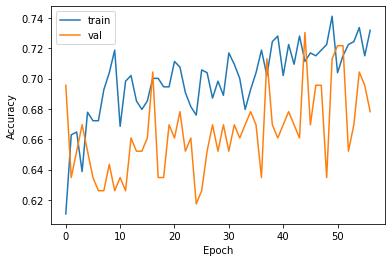

In [70]:
# 10. 학습 시각화하기
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

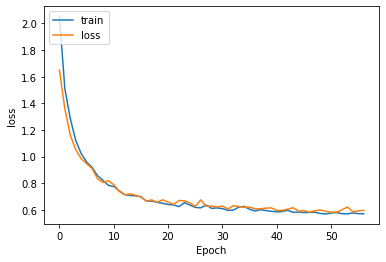

In [71]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train', 'loss'], loc = 'upper left')
plt.show()
#loss dont decent.
#why decent afther drop out?